<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/d/d9/Logo_T%C3%A9l%C3%A9com_ParisTech.svg/1024px-Logo_T%C3%A9l%C3%A9com_ParisTech.svg.png" alt="Smiley face" height="62" width="62" style="float:right">

<h1 style="color:#C50347 ;text-align:center">   SOUDANI Jawher <br><h3 style="color:#ceb13d">MACHINE LEARNING AND DATA MINING 2017-2018</h3>
<br>


In [13]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
iris = datasets.load_iris()
irisX=iris.data
irisy=iris.target
np.unique(irisy)

array([0, 1, 2])

In [17]:
np.random.seed(0)
indices=np.random.permutation(len(irisX))
irisXtrain=irisX[indices[:-10]]
irisytrain=irisy[indices[:-10]]
irisXtest=irisX[indices[-10 :]]
irisytest=irisy[indices[-10 :]]

In [44]:
knn = KNeighborsClassifier(leaf_size=1)
knn.fit(irisXtrain,irisytrain)
#NeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=1,n_neighbors=5,p=2,weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn.predict(irisXtest)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [47]:
irisytest

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [48]:
accuracy_score(irisytest,knn.predict(irisXtest))

0.90000000000000002

## Error of the classifier 

###### I used two methods to calculate the number of errors

In [49]:
len(irisXtest)-knn.score(irisXtest,irisytest)*len(irisXtest)

1.0

###### or

In [50]:
def errorcal(ytrue,ypredict):
    return np.sum(ytrue != ypredict)

In [28]:
errorcal(irisytest,knn.predict(irisXtest))

1

## Best k using cross validation ( for this data set )

###### I used grid search to find the best K for this data set

In [43]:
param_grid = [
  {'leaf_size': np.linspace(1,50,50)}
 ]
knn2 = GridSearchCV(knn, param_grid)
knn2.fit(irisXtrain, irisytrain)
knn2.best_params_

{'leaf_size': 1.0}

###### the best k is 1 ( this doesn't make good sense , but here we accept it because the data set is small)

## Two other classifiers 

##### I used mlp and random forest  and I compared all of them in score and in time

In [ ]:
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    MLPClassifier()
    ]

cols=["Classifier", "Accuracy","Execution-Time"]
score_table = pd.DataFrame(columns=cols)

for clf in classifiers:
    start_time = time.time()
    name = clf.__class__.__name__
    
    print("="*40)
    print(name)
    print('****Results****')
    scores = cross_val_score(clf, irisXtrain, irisytrain, cv=5)
    print(scores.mean())
    time_limit=time.time() - start_time
    print("--- time_limit %s seconds ---" ,time_limit)    

    new_entry = pd.DataFrame([[name, scores.mean(),time_limit]], columns=cols)
    score_table = score_table.append(new_entry)
    
print("="*40)

###### I plotted the results here for clearance

In [59]:
score_table.set_index([np.arange(0,3)],inplace=True)
score_table

,Classifier,Accuracy,Execution-Time
0,KNeighborsClassifier,0.978307,0.029020
1,RandomForestClassifier,0.957090,0.083560
2,MLPClassifier,0.971164,1.068184


###### and for more clearance I plotted the comparison in time and in score

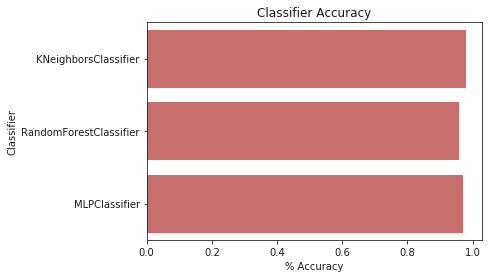

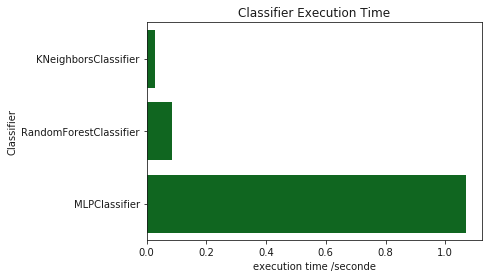

In [64]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=score_table, color="r")
plt.xlabel('% Accuracy')
plt.title('Classifier Accuracy')
plt.show()
sns.set_color_codes("dark")
sns.barplot(x='Execution-Time', y='Classifier', data=score_table, color="g")
plt.xlabel('execution time /seconde')
plt.title('Classifier Execution Time')
plt.show()

###### for this data set , the winner in score and time together is knn (because it's a small dataset other wise mlp is much stronger)